In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix
from mpl_toolkits import mplot3d #for 3d analysis
import statistics
from functools import reduce
from sklearn import linear_model
from scipy.stats import norm
import datetime
import time
import requests
import io

In [3]:
symbols = ['SPY','TSLA', 'AAPL']

In [4]:
df = web.get_data_yahoo(symbols,
                               start = '2013-01-01',
                               end = '2021-11-26')
df

Attributes   Adj Close                                Close               \
Symbols            SPY         TSLA        AAPL         SPY         TSLA   
Date                                                                       
2012-12-31  120.617813     6.774000   16.439856  142.410004     6.774000   
2013-01-02  123.709282     7.072000   16.960688  146.059998     7.072000   
2013-01-03  123.429756     6.954000   16.746609  145.729996     6.954000   
2013-01-04  123.971779     6.880000   16.280138  146.369995     6.880000   
2013-01-07  123.633034     6.868000   16.184374  145.970001     6.868000   
...                ...          ...         ...         ...          ...   
2021-11-19  468.890015  1137.060059  160.550003  468.890015  1137.060059   
2021-11-22  467.570007  1156.869995  161.020004  467.570007  1156.869995   
2021-11-23  468.190002  1109.030029  161.410004  468.190002  1109.030029   
2021-11-24  469.440002  1116.000000  161.940002  469.440002  1116.000000   
2021-11-26  458.970001  1081.920044  156.809998  458.970001  1081.920044   

Attributes                    High                                  Low  \
Symbols           AAPL         SPY         TSLA        AAPL         SPY   
Date                                                                      
2012-12-31   19.006071  142.559998     6.794000   19.121429  139.539993   
2013-01-02   19.608213  146.149994     7.090000   19.821428  144.729996   
2013-01-03   19.360714  146.369995     7.090000   19.631071  145.339996   
2013-01-04   18.821428  146.610001     6.960000   19.236786  145.669998   
2013-01-07   18.710714  146.110001     6.960000   18.903570  145.429993   
...                ...         ...          ...         ...         ...   
2021-11-19  160.550003  470.940002  1138.719971  161.020004  468.500000   
2021-11-22  161.020004  473.540009  1201.949951  165.699997  467.350006   
2021-11-23  161.410004  469.100006  1180.500000  161.800003  464.450012   
2021-11-24  161.940002  469.570007  1132.770020  162.139999  465.190002   
2021-11-26  156.809998  463.899994  1108.780029  160.449997  457.769989   

Attributes                                 Open                           \
Symbols            TSLA        AAPL         SPY         TSLA        AAPL   
Date                                                                       
2012-12-31     6.600000   18.178572  139.660004     6.600000   18.233213   
2013-01-02     6.942000   19.343929  145.110001     7.000000   19.779285   
2013-01-03     6.950000   19.321428  145.990005     7.036000   19.567142   
2013-01-04     6.784000   18.779642  145.970001     6.960000   19.177500   
2013-01-07     6.780000   18.400000  145.850006     6.960000   18.642857   
...                 ...         ...         ...          ...         ...   
2021-11-19  1092.699951  156.529999  469.609985  1098.869995  157.649994   
2021-11-22  1132.430054  161.000000  470.890015  1162.329956  161.679993   
2021-11-23  1062.699951  159.059998  467.220001  1167.510010  161.119995   
2021-11-24  1062.000000  159.639999  466.059998  1080.390015  160.750000   
2021-11-26  1081.000000  156.360001  462.339996  1099.469971  159.570007   

Attributes       Volume                           
Symbols             SPY        TSLA         AAPL  
Date                                              
2012-12-31  243935200.0   2974500.0  659492400.0  
2013-01-02  192059000.0   5974000.0  560518000.0  
2013-01-03  144761800.0   3710000.0  352965200.0  
2013-01-04  116817700.0   3370000.0  594333600.0  
2013-01-07  110002500.0   2210000.0  484156400.0  
...                 ...         ...          ...  
2021-11-19   57288900.0  21168000.0  117147500.0  
2021-11-22   72762000.0  33072500.0  117467900.0  
2021-11-23   73206500.0  36171700.0   96041900.0  
2021-11-24   61858800.0  22560200.0   69463600.0  
2021-11-26  112669600.0  11680900.0   76959800.0  

[2244 rows x 18 columns]

In [5]:
price_data = df['Adj Close']
price_data.head()

Symbols,SPY,TSLA,AAPL
Date,,,
2012-12-31,120.617813,6.774,16.439856
2013-01-02,123.709282,7.072,16.960688
2013-01-03,123.429756,6.954,16.746609
2013-01-04,123.971779,6.880,16.280138
2013-01-07,123.633034,6.868,16.184374


In [15]:
weights = np.array([0.5,0.25,0.25])

In [16]:
ret_data = price_data.pct_change()[1:]
ret_data.head()

Symbols,SPY,TSLA,AAPL
Date,,,
2013-01-02,0.025630,0.043992,0.031681
2013-01-03,-0.002260,-0.016686,-0.012622
2013-01-04,0.004391,-0.010641,-0.027855
2013-01-07,-0.002732,-0.001744,-0.005882
2013-01-08,-0.002877,-0.019220,0.002692


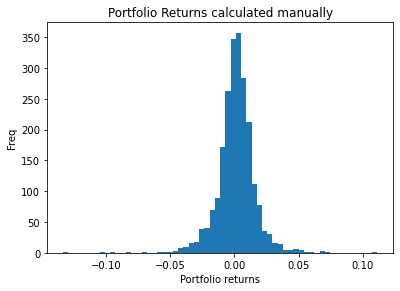

In [17]:
weighted_returns = (weights * ret_data)
port_ret = weighted_returns.sum(axis=1)
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show(); 


In [18]:
mean_ret = port_ret.mean()
std_returns = port_ret.std()
print("Mean returns:")
print(mean_ret)
print("Standard deviation:") 
print(std_returns)


Mean returns:
0.0013358060407548723
Standard deviation:
0.014698907258355105


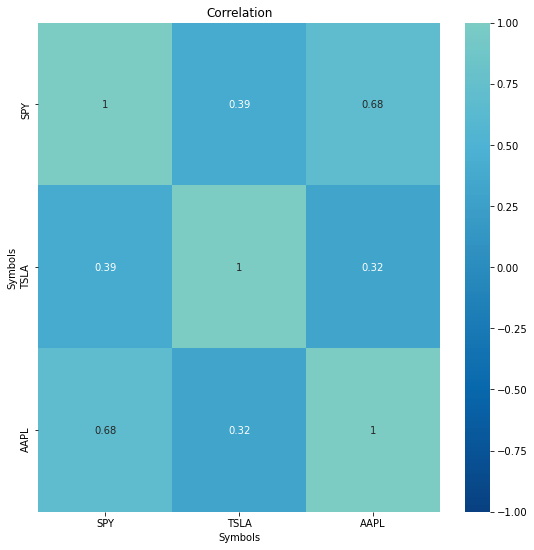

In [19]:
ret_data.corr()
correlation = ret_data.corr()

plt.figure(figsize=(9,9))
plt.title('Correlation')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1) 

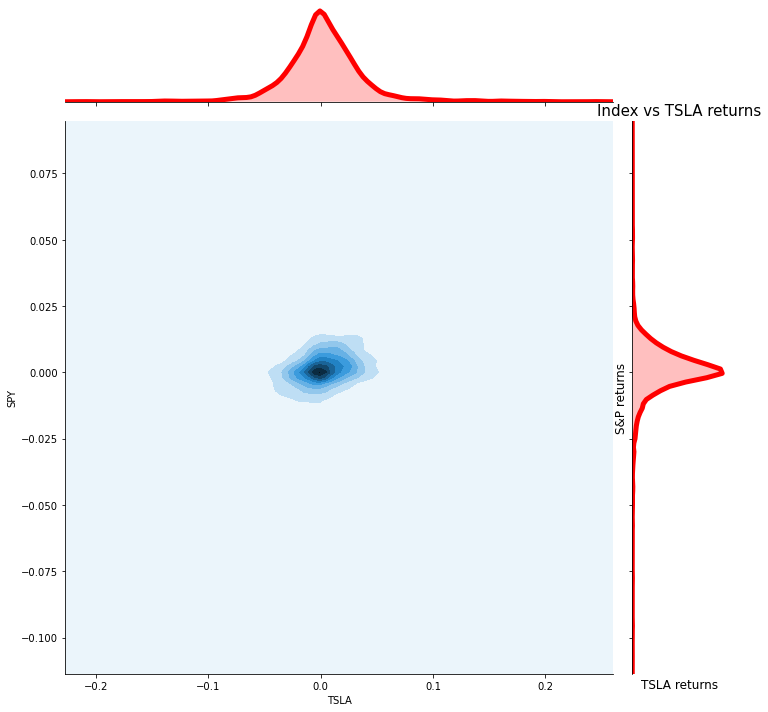

In [20]:
sns.jointplot(x=ret_data['TSLA'], 
              y=ret_data['SPY'],
              height=10,
              kind="kde",
              marginal_kws={'lw':5,
                                'color':'red'})
plt.ylabel("S&P returns", fontsize=12)
plt.xlabel("TSLA returns", fontsize=12)
plt.title("Index vs TSLA returns", fontsize=15)
plt.show()

In [21]:
capital = 1000
cov_matrix = ret_data.cov()
cov_matrix

Symbols,SPY,TSLA,AAPL
Symbols,,,
SPY,0.000107,0.000144,0.000124
TSLA,0.000144,0.001241,0.000200
AAPL,0.000124,0.000200,0.000316


In [22]:
ind_mean = ret_data.mean()
ind_mean
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 
# Calculate mean of investment
mean_investment = (1+ind_mean) * capital
             
# Calculate standard deviation of investmnet
stdev_investment = capital * port_stdev
pfl_mean = ind_mean.dot(weights)
pfl_stddev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
mean_investment = (1+pfl_mean) * capital
stdev_investment = capital * pfl_stddev
conf_level = 0.05

inv = norm.ppf(conf_level, mean_investment, stdev_investment)
var_1 = capital - inv
percentage_var = var_1 *100 / capital
print('Portfolio will not lose more than:') 
print('$', var_1, 'or', percentage_var, '%' ' today') 

Portfolio will not lose more than:
$ 22.841744875373934 or 2.2841744875373933 % today


1 day VaR @ 95% confidence: 22.84
2 day VaR @ 95% confidence: 32.3
3 day VaR @ 95% confidence: 39.56
4 day VaR @ 95% confidence: 45.68
5 day VaR @ 95% confidence: 51.08
6 day VaR @ 95% confidence: 55.95
7 day VaR @ 95% confidence: 60.43
8 day VaR @ 95% confidence: 64.61
9 day VaR @ 95% confidence: 68.53
10 day VaR @ 95% confidence: 72.23
11 day VaR @ 95% confidence: 75.76
12 day VaR @ 95% confidence: 79.13
13 day VaR @ 95% confidence: 82.36
14 day VaR @ 95% confidence: 85.47
15 day VaR @ 95% confidence: 88.47
16 day VaR @ 95% confidence: 91.37
17 day VaR @ 95% confidence: 94.18
18 day VaR @ 95% confidence: 96.91
19 day VaR @ 95% confidence: 99.56
20 day VaR @ 95% confidence: 102.15
21 day VaR @ 95% confidence: 104.67
22 day VaR @ 95% confidence: 107.14
23 day VaR @ 95% confidence: 109.55
24 day VaR @ 95% confidence: 111.9
25 day VaR @ 95% confidence: 114.21
26 day VaR @ 95% confidence: 116.47
27 day VaR @ 95% confidence: 118.69
28 day VaR @ 95% confidence: 120.87
29 day VaR @ 95% confi

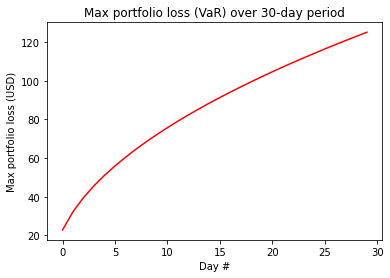

In [23]:
var_array = []
num_days = int(30)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 30-day period")
plt.plot(var_array, "r")